In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

# Insights About Dataset & Visualize

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
list(df.columns)

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Fill missing values

In [7]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

df = df.drop('id', axis=1)


# Visualize distribution of dataset

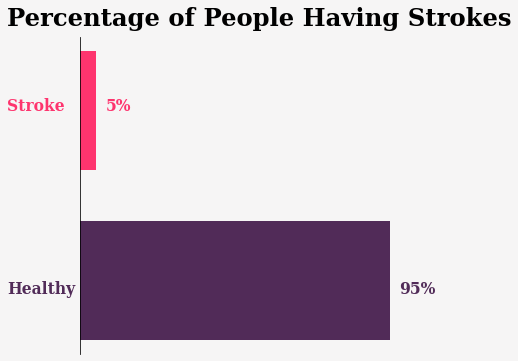

In [8]:
x = pd.DataFrame( df.groupby(['stroke'])['stroke'].count())

# plot
fig, ax = plt.subplots(figsize = (6,6), dpi = 70)
ax.barh([1], x.stroke[1], height = 0.7, color = '#fe346e')
plt.text(-1150,-0.08, 'Healthy',{'font': 'Serif','weight':'bold','Size': '16','style':'normal', 'color':'#512b58'})
plt.text(5000,-0.08, '95%',{'font':'Serif','weight':'bold' ,'size':'16','color':'#512b58'})
ax.barh([0], x.stroke[0], height = 0.7, color = '#512b58')
plt.text(-1150,1, 'Stroke', {'font': 'Serif','weight':'bold','Size': '16','style':'normal', 'color':'#fe346e'})
plt.text(400,1, '5%',{'font':'Serif', 'weight':'bold','size':'16','color':'#fe346e'})

plt.text(-1150, 1.5, 'Percentage of People Having Strokes', {'font': 'Serif','weight':'bold','Size': '25', 'color':'black'})

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Univariate analysis of continous variables

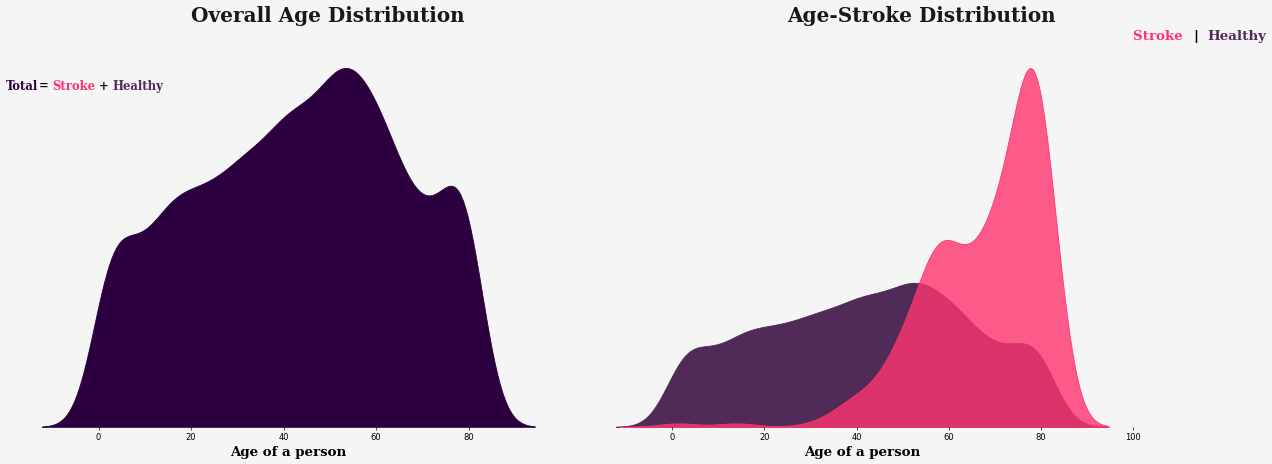

In [9]:
fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(6,18)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[1:6,0:9]) #distribution plot
ax2 = fig.add_subplot(gs[1:6, 9:18]) #hue distribution plot

# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'age', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(20,0.018,'Overall Age Distribution ', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)

ax1.text(-20,0.015, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax1.text(-13,0.015, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(-10,0.015, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax1.text(0,0.015, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax1.text(3,0.015, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'age',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(25,0.045,'Age-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

ax2.text(100,0.043, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(113,0.043, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax2.text(116,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.show()

## Glucose

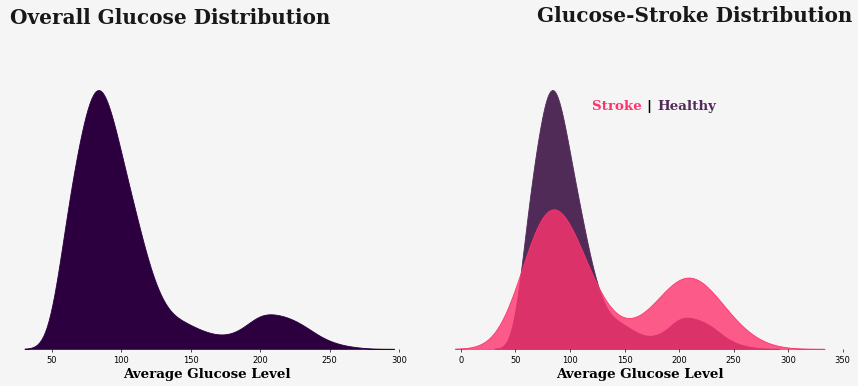

In [10]:
fig = plt.figure(figsize = (18,6), dpi = 60)

gs = fig.add_gridspec(6,18)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[0:6,0:9]) #distribution plot
ax2 = fig.add_subplot(gs[0:6, 9:18]) #hue distribution plot

# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'avg_glucose_level', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('Average Glucose Level ', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(20,0.02,'Overall Glucose Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)


# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(70,0.0205,'Glucose-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

ax2.text(120,0.015, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(170,0.015, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax2.text(180,0.015, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.show()

In [11]:
df_glucose=sorted(df['avg_glucose_level'])
Q1,Q3=np.percentile(df_glucose,[25,75])
IQR= Q3-Q1
lower_range= Q1-(3*IQR)
upper_range=Q3+(3*IQR)

print(lower_range,upper_range)
df_lower_outliers=df[df.avg_glucose_level<lower_range]
df_upper_outliers=df[df.avg_glucose_level>upper_range]

-33.29000000000005 224.62500000000006


In [12]:
len(df_lower_outliers)

0

In [13]:
len(df_upper_outliers)

166

In [14]:
len(df_glucose)

5110

In [15]:
len(df_upper_outliers) / len(df_glucose) * 100

3.24853228962818

<AxesSubplot:xlabel='avg_glucose_level'>

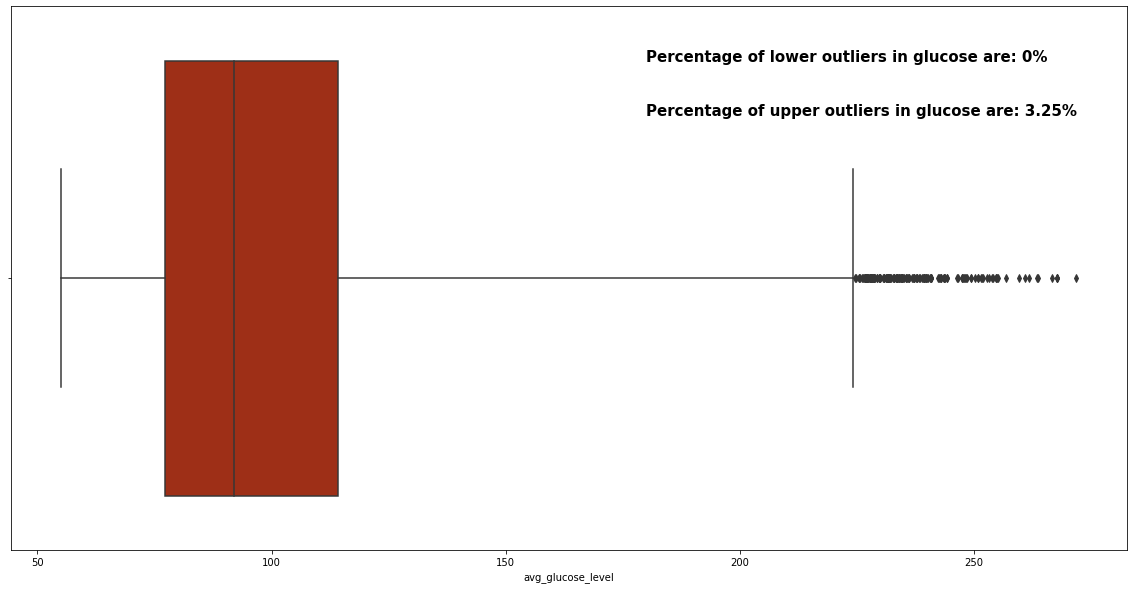

In [16]:
plt.figure(figsize=(20,10))
plt.text(180,-0.3,'Percentage of upper outliers in glucose are: {:.2f}%'.format(len(df_upper_outliers) / len(df_glucose) * 100),fontweight='bold',fontsize=15)
plt.text(180,-0.4,'Percentage of lower outliers in glucose are: 0%',fontweight='bold',fontsize=15)
sns.boxplot(data=df,x='avg_glucose_level',palette='gnuplot', whis=3)

In [17]:
df1_outliers_glucose=df.drop(df[df.avg_glucose_level>upper_range].index)

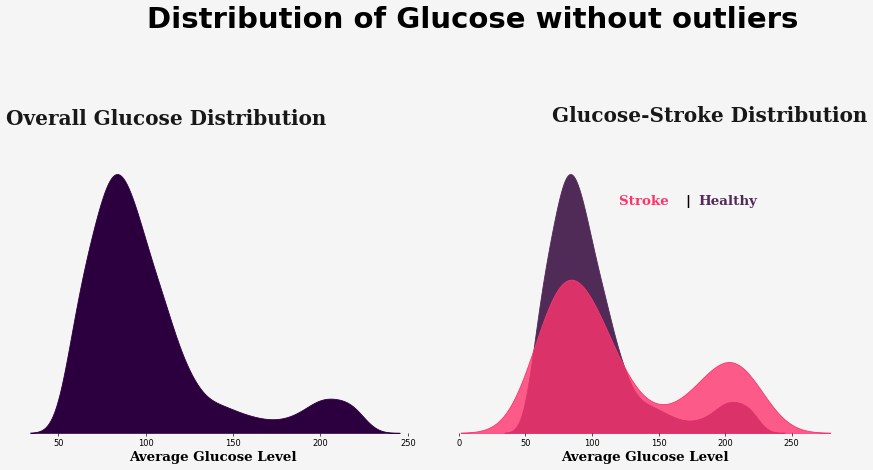

In [18]:
fig = plt.figure(figsize = (18,6), dpi = 60)

gs = fig.add_gridspec(6,18)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[0:6,0:9]) #distribution plot
ax2 = fig.add_subplot(gs[0:6, 9:18]) #hue distribution plot

# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable

sns.kdeplot(data = df1_outliers_glucose, x = 'avg_glucose_level', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('Average Glucose Level ', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(20,0.02,'Overall Glucose Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)


# distribution plots with hue of strokes


sns.kdeplot(data = df1_outliers_glucose[df1_outliers_glucose['stroke'] == 0], x = 'avg_glucose_level',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df1_outliers_glucose[df1_outliers_glucose['stroke'] == 1], x = 'avg_glucose_level',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(70,0.0205,'Glucose-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

ax2.text(120,0.015, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(170,0.015, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax2.text(180,0.015, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.25,1.25,'Distribution of Glucose without outliers', {'weight':'bold','color': 'black', 'size':35})
fig.show()

### BMI Index

In [19]:
df = df1_outliers_glucose

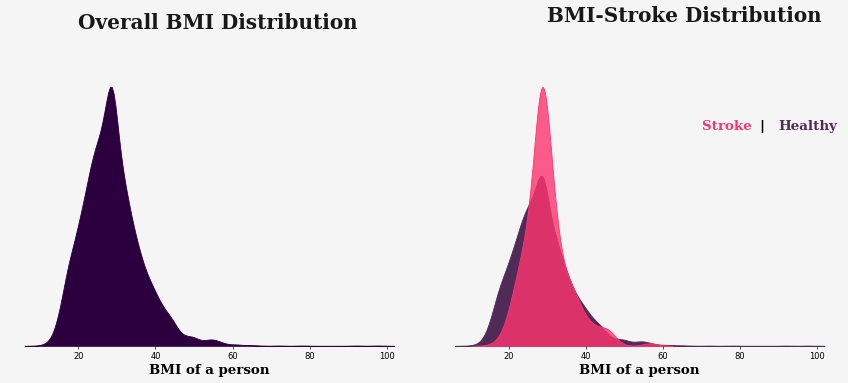

In [20]:
fig = plt.figure(figsize = (18,6), dpi = 60)

gs = fig.add_gridspec(6,18)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[0:6,0:9]) #distribution plot
ax2 = fig.add_subplot(gs[0:6, 9:18]) #hue distribution plot

# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'bmi', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('BMI of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(20,0.08,'Overall BMI Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)


# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('BMI of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(30,0.12,'BMI-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

ax2.text(70,0.08, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(85,0.08, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax2.text(90,0.08, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.show()

In [21]:
df_bmi=sorted(df['bmi'])
Q1,Q3=np.percentile(df_bmi,[25,75])
IQR= Q3-Q1
lower_range= Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)

print(lower_range,upper_range)
df_lower_outliers=df[df.bmi<lower_range]
df_upper_outliers=df[df.bmi>upper_range]

10.100000000000001 46.1


In [22]:
len(df_lower_outliers) / len(df_bmi) * 100

0.0

In [23]:
len(df_upper_outliers) / len(df_bmi) * 100

2.4271844660194173

<AxesSubplot:title={'center':'Box Plot of body mass index'}, xlabel='bmi'>

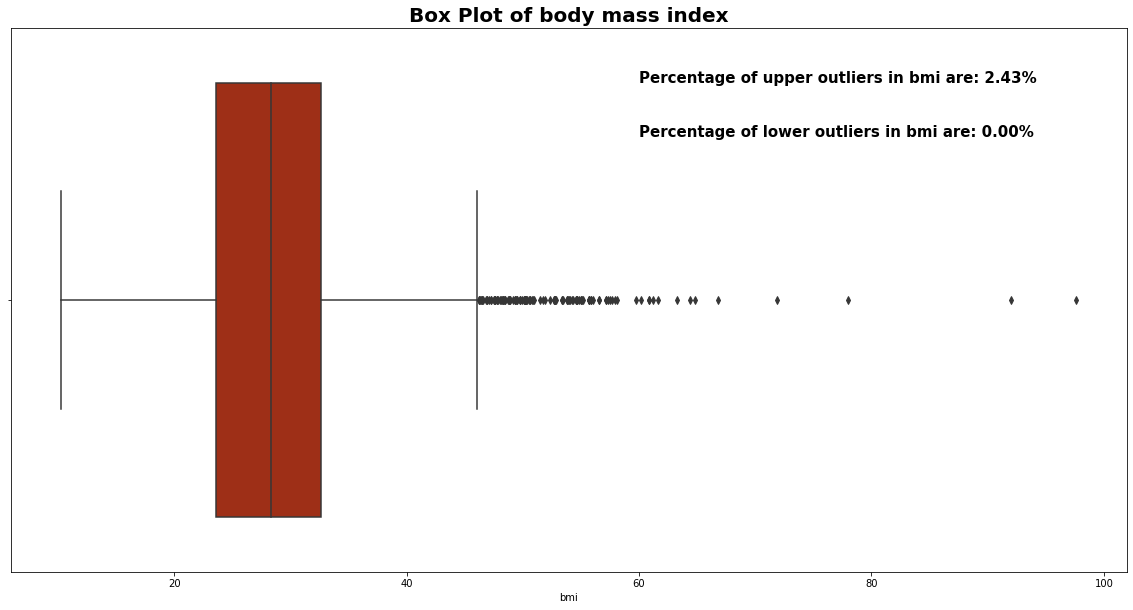

In [24]:
plt.figure(figsize=(20,10))
plt.text(60,-0.3,'Percentage of lower outliers in bmi are: {:.2f}%'.format(len(df_lower_outliers) / len(df_bmi) * 100),fontweight='bold',fontsize=15)
plt.text(60,-0.4,'Percentage of upper outliers in bmi are: {:.2f}%'.format(len(df_upper_outliers) / len(df_bmi) * 100),fontweight='bold',fontsize=15)
plt.title("Box Plot of body mass index",fontweight='bold',fontsize=20)
sns.boxplot(data=df,x='bmi',palette='gnuplot')

In [25]:
df1_without_outliers=df.drop(df[df.bmi>upper_range].index)

In [26]:
len(df1_without_outliers)

4824

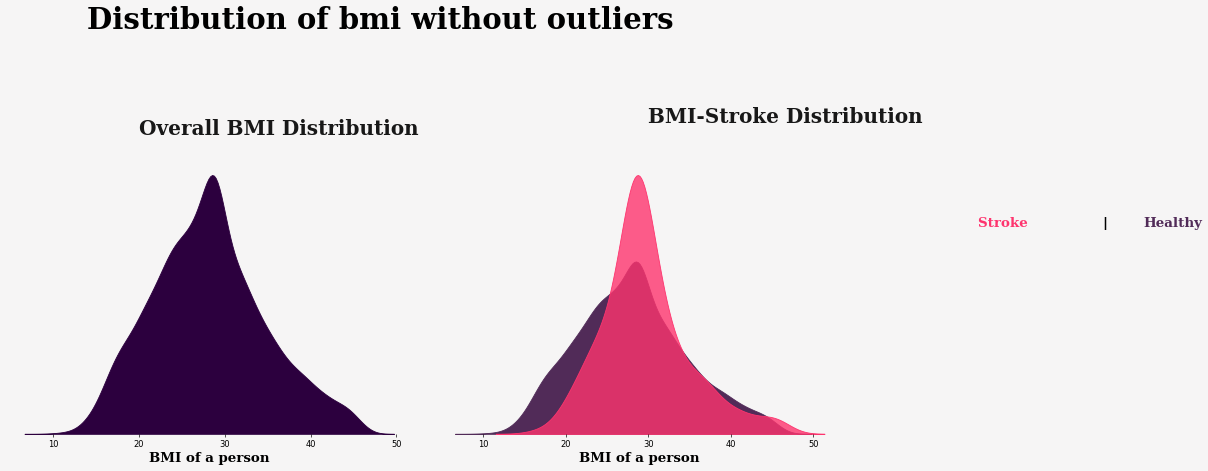

In [27]:
fig = plt.figure(figsize = (18,6), dpi = 60)

gs = fig.add_gridspec(6,18)
gs.update(wspace = 1, hspace = 0.05)


ax1 = fig.add_subplot(gs[0:6,0:9]) #distribution plot
ax2 = fig.add_subplot(gs[0:6, 9:18]) #hue distribution plot

# axes list
axes = [ ax1, ax2]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        


# distribution plots ---- only single variable

sns.kdeplot(data = df1_without_outliers, x = 'bmi', ax = ax1, shade = True, color = '#2c003e', alpha = 1, )
ax1.set_xlabel('BMI of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax1.text(20,0.08,'Overall BMI Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)


# distribution plots with hue of strokes


sns.kdeplot(data = df1_without_outliers[df1_without_outliers['stroke'] == 0], x = 'bmi',ax = ax2, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df1_without_outliers[df1_without_outliers['stroke'] == 1], x = 'bmi',ax = ax2, shade = True,  alpha = 0.8, color = '#fe346e')

ax2.set_xlabel('BMI of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax2.text(30,0.12,'BMI-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

ax2.text(70,0.08, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax2.text(85,0.08, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax2.text(90,0.08, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.2,1.25,'Distribution of bmi without outliers',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.show()

In [28]:
df1_without_outliers.keys()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [29]:
len(df1_without_outliers)

4824

In [30]:
len(df)

4944

In [31]:
df = df1_without_outliers

## Univariate analysis of discrete variables

In [32]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold')
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


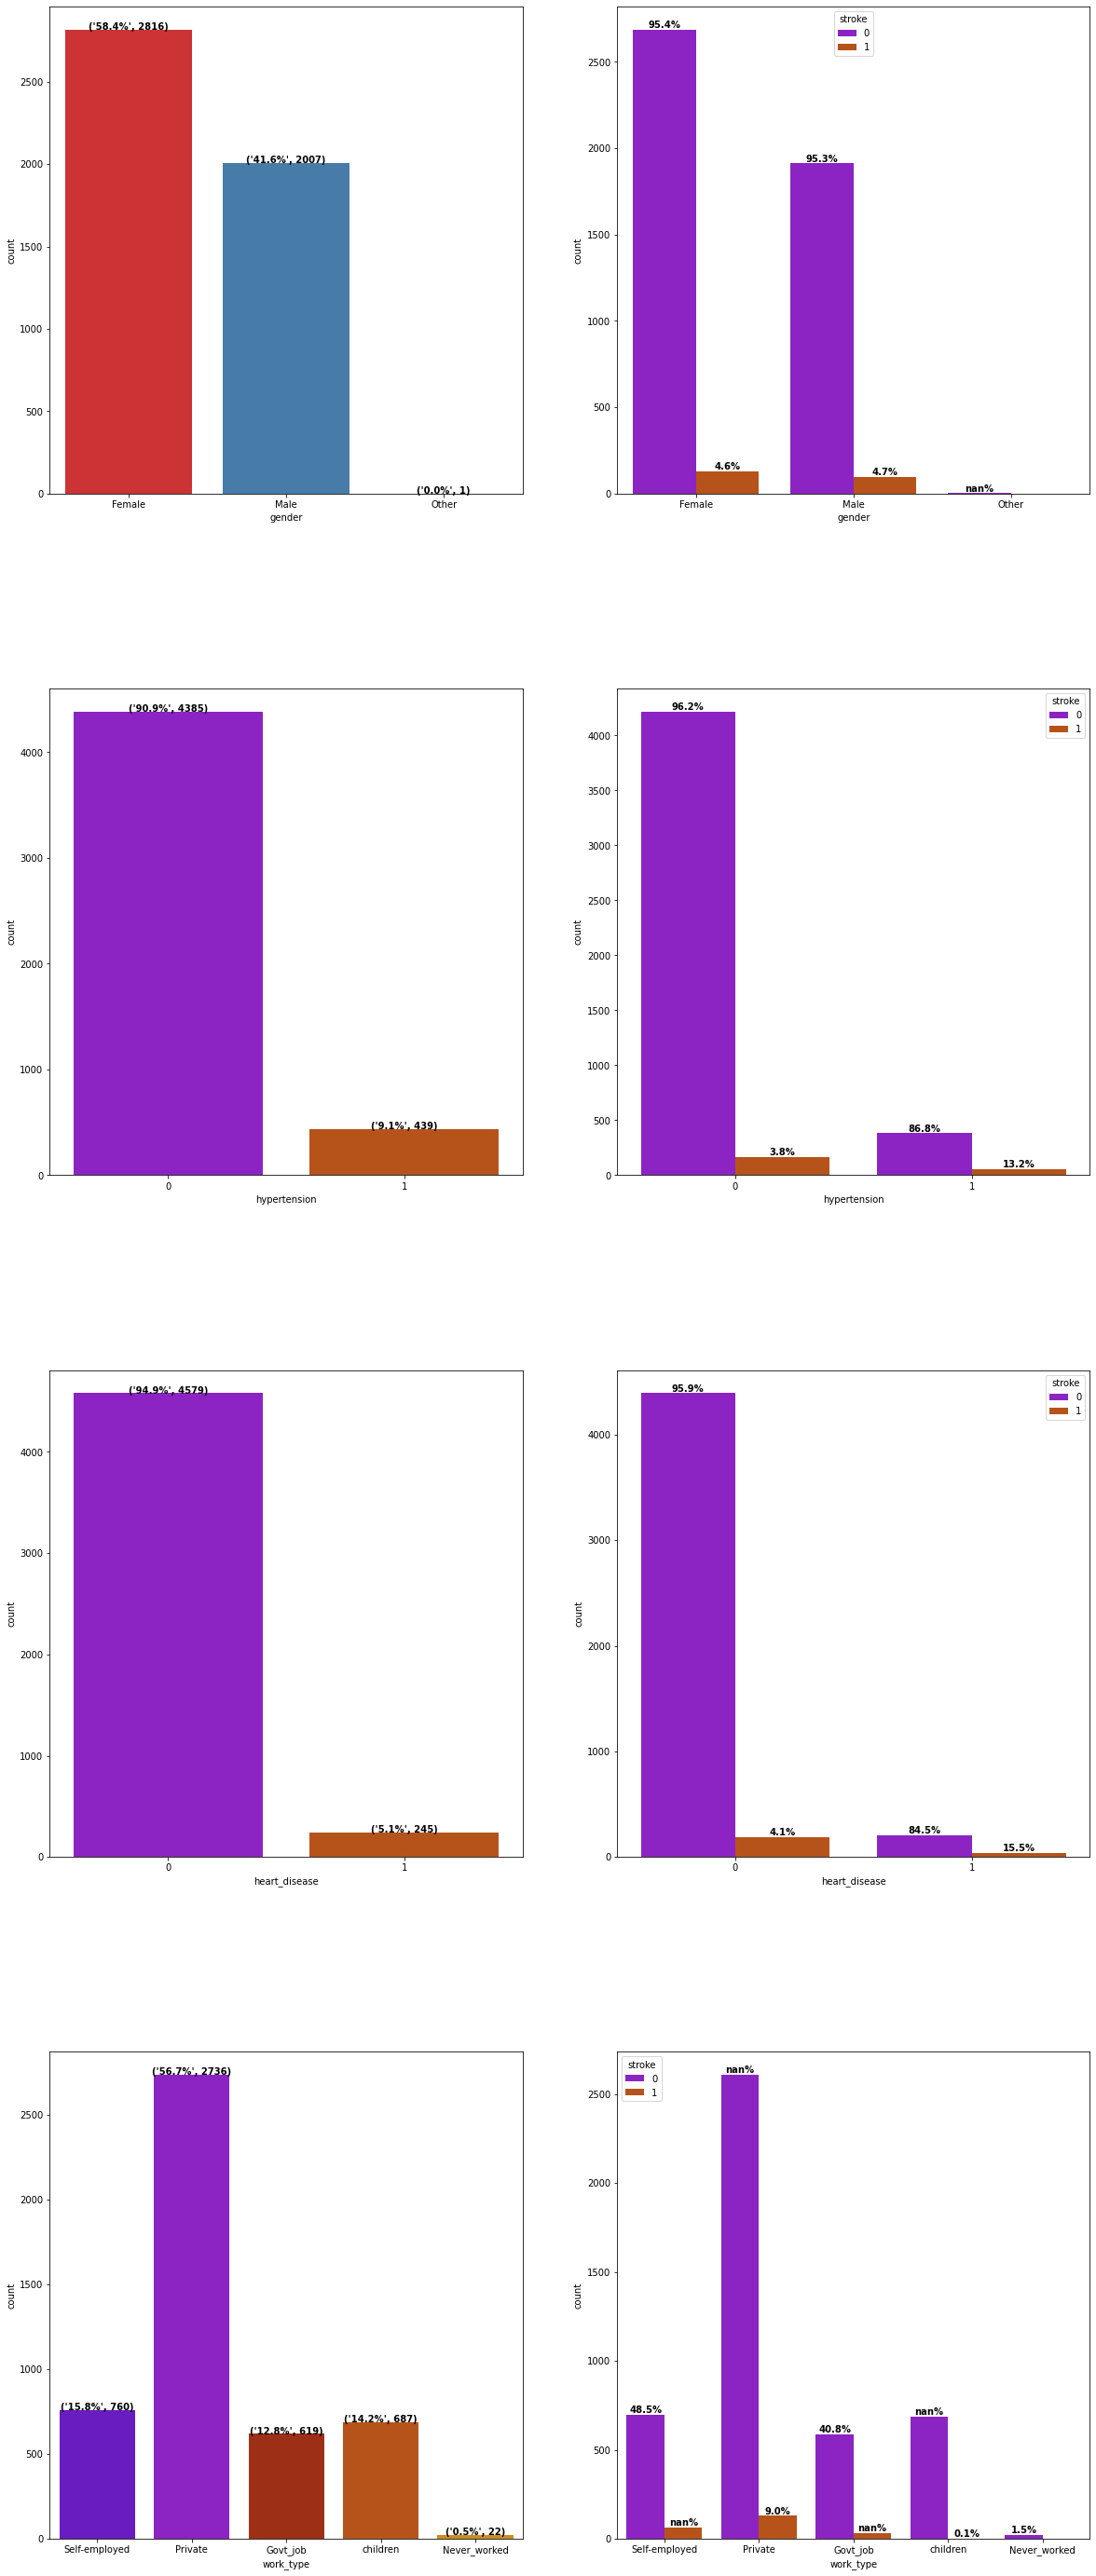

In [33]:
f,ax=plt.subplots(nrows=4,ncols=2,figsize=(20,50), 
                  gridspec_kw={'width_ratios': [10,10],
                               'height_ratios': [10,10,10,10],'wspace': 0.2,
                       'hspace': 0.4})


a1=sns.countplot(data=df,x="gender",ax=ax[0][0],palette="Set1")
without_hue(df,'gender',a1)
a2=sns.countplot(data=df,x='gender',hue='stroke',palette="gnuplot",ax=ax[0][1])
with_hue(df,'gender',a2)

b1=sns.countplot(data=df,x="hypertension",palette="gnuplot",ax=ax[1][0])
without_hue(df,'hypertension',b1)
b2=sns.countplot(data=df,x='hypertension',hue='stroke',palette="gnuplot",ax=ax[1][1])
with_hue(df,'hypertension',b2)

c1=sns.countplot(data=df,x="heart_disease",palette="gnuplot",ax=ax[2][0])
without_hue(df,'heart_disease',c1)
c2=sns.countplot(data=df,x='heart_disease',hue='stroke',palette="gnuplot",ax=ax[2][1])
with_hue(df,'heart_disease',c2)

d1=sns.countplot(data=df,x="work_type",palette="gnuplot",ax=ax[3][0])
without_hue(df,'heart_disease',d1)
d2=sns.countplot(data=df,x='work_type',hue='stroke',palette="gnuplot",ax=ax[3][1])
with_hue(df,'heart_disease',d2)

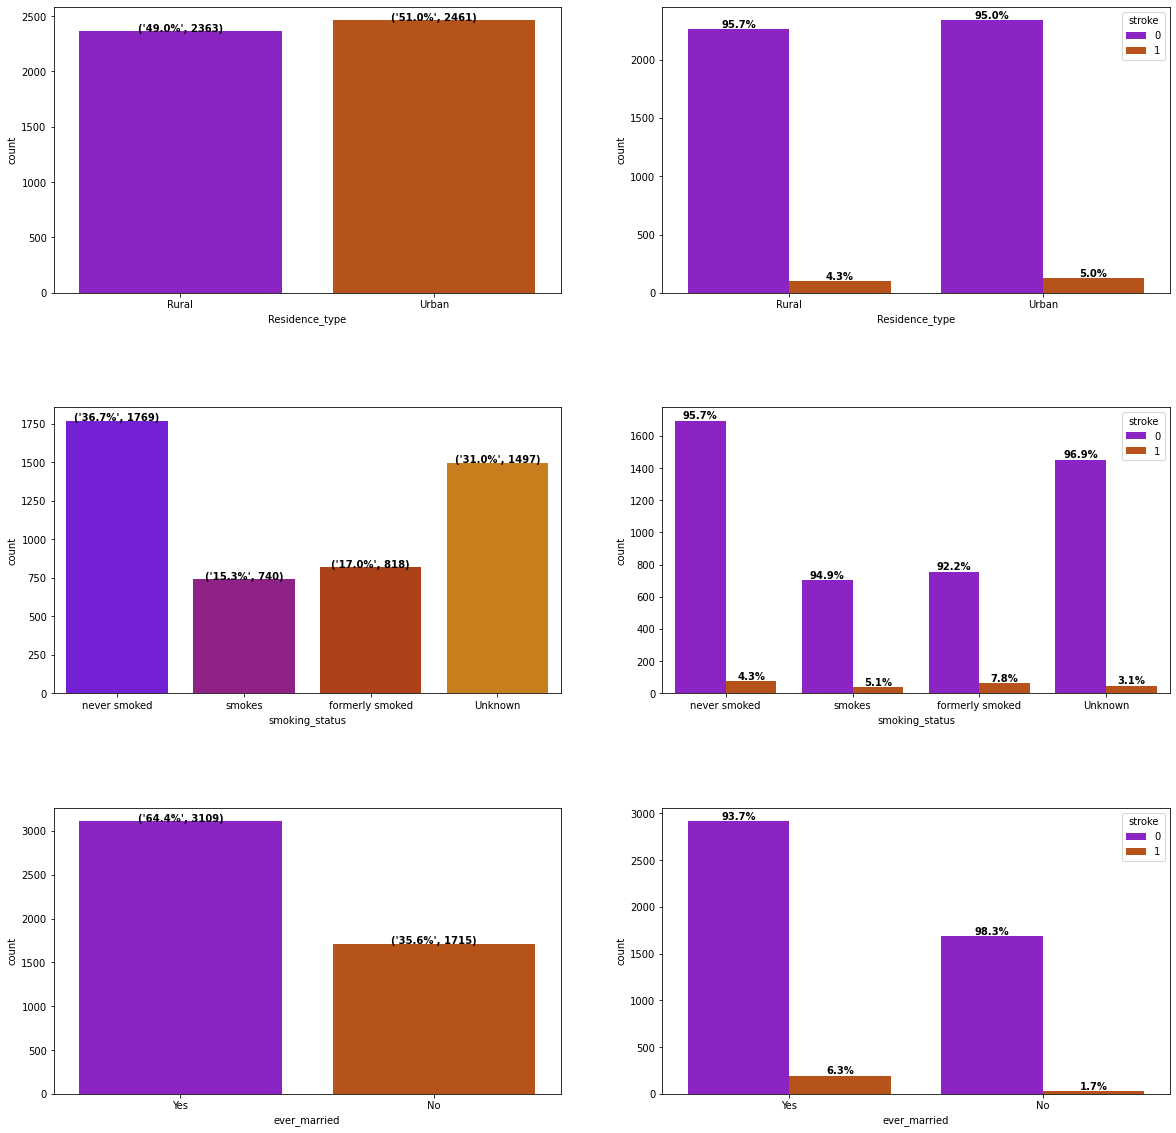

In [34]:
f,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,20), 
                  gridspec_kw={'width_ratios': [10,10],
                               'height_ratios': [10,10,10],'wspace': 0.2,
                       'hspace': 0.4})




e1=sns.countplot(data=df,x="Residence_type",palette="gnuplot",ax=ax[0][0])
without_hue(df,'Residence_type',e1)

e2=sns.countplot(data=df,x='Residence_type',hue='stroke',palette="gnuplot",ax=ax[0][1])
with_hue(df,'Residence_type',e2)

f1=sns.countplot(data=df,x="smoking_status",palette="gnuplot",ax=ax[1][0])
without_hue(df,"smoking_status",f1)

f2=sns.countplot(data=df,x='smoking_status',hue='stroke',palette="gnuplot",ax=ax[1][1])
with_hue(df,"smoking_status",f2)

g1=sns.countplot(data=df,x="ever_married",palette="gnuplot",ax=ax[2][0])
without_hue(df,"ever_married",g1)

g2=sns.countplot(data=df,x='ever_married',hue='stroke',palette="gnuplot",ax=ax[2][1])
with_hue(df,"ever_married",g2)

# Model


In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import optuna
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,roc_auc_score,plot_roc_curve,f1_score
from sklearn.preprocessing import StandardScaler

In [47]:
df2=df.copy()

In [48]:
df2['age'] = df2['age'].apply(lambda x: np.log(x+10)*3)
df2['avg_glucose_level'] = df2['avg_glucose_level'].apply(lambda x: np.log(x+10)*2)
df2['bmi'] = df2['bmi'].apply(lambda x: np.log(x+10)*2)

In [49]:
df2['work_type'].value_counts()

Private          2736
Self-employed     760
children          687
Govt_job          619
Never_worked       22
Name: work_type, dtype: int64

In [50]:
df2['smoking_status'].value_counts()

never smoked       1769
Unknown            1497
formerly smoked     818
smokes              740
Name: smoking_status, dtype: int64

## Label Encoding

In [51]:
df2['gender']=df2["gender"].map({"Male":0,"Female":1,"Other":2}).astype(int)
df2['ever_married']=df2["ever_married"].map({"Yes":1,"No":0}).astype(int)
df2['Residence_type']=df2["Residence_type"].map({"Urban":1,"Rural":0}).astype(int)
df2['work_type']=df2['work_type'].map({"Private":0,'Self-employed':1,'children':2,'Govt_job':3,
                                      "Never_worked":4})
df2['smoking_status']=df2['smoking_status'].map({'never smoked':0,'Unknown':1,'formerly smoked':2,
                                                "smokes":3})

df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,1,12.788040,0,0,1,1,0,10.715153,7.321641,0,1
2,31112,0,13.499429,0,1,1,0,0,9.505801,7.499008,0,1
3,60182,1,12.232612,0,0,1,0,1,10.399534,7.586479,3,1
4,1665,1,13.465909,1,0,1,1,0,10.431175,7.052721,0,1
5,56669,0,13.532579,0,0,1,0,1,10.558371,7.327123,2,1


In [52]:
df2.drop(['id'], axis=1, inplace=True)

In [53]:
list(df2.columns)

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [54]:
Y_new=df2['stroke']
X_new=df2.drop('stroke', axis=1)

In [55]:
X_new.drop(['gender', 'Residence_type'], axis=1, inplace=True)

In [56]:
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(X_new,Y_new,test_size=0.2,random_state=42)

In [57]:
y_train_new.value_counts()

0    3691
1     168
Name: stroke, dtype: int64

In [58]:
y_test_new.value_counts()

0    908
1     57
Name: stroke, dtype: int64

In [59]:
smt=SMOTE()
x_train_sampling_new,y_train_sampling_new=smt.fit_resample(x_train_new,y_train_new)

In [60]:
y_train_sampling_new.value_counts()

1    3691
0    3691
Name: stroke, dtype: int64

## Random Forest Classifier

In [50]:
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 2, 20)
    max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    return cross_val_score(clf, x_train_sampling_new, y_train_sampling_new, 
           n_jobs=-1, cv=5,scoring='f1').mean()


In [51]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2021-05-30 17:52:33,483] A new study created in memory with name: no-name-1038e631-5ddd-4611-b3c3-7bb806e8983e
[I 2021-05-30 17:52:34,514] Trial 0 finished with value: 0.8586123750993112 and parameters: {'n_estimators': 19, 'max_depth': 8.82566932542377}. Best is trial 0 with value: 0.8586123750993112.
[I 2021-05-30 17:52:35,116] Trial 1 finished with value: 0.8025768966246506 and parameters: {'n_estimators': 12, 'max_depth': 3.5497289511309664}. Best is trial 0 with value: 0.8586123750993112.
[I 2021-05-30 17:52:35,697] Trial 2 finished with value: 0.8966552195267642 and parameters: {'n_estimators': 16, 'max_depth': 11.86539680444173}. Best is trial 2 with value: 0.8966552195267642.
[I 2021-05-30 17:52:35,764] Trial 3 finished with value: 0.771894598916894 and parameters: {'n_estimators': 7, 'max_depth': 1.0853702634100428}. Best is trial 2 with value: 0.8966552195267642.
[I 2021-05-30 17:52:35,810] Trial 4 finished with value: 0.8232147959645832 and parameters: {'n_estimators': 2,

[I 2021-05-30 17:52:40,144] Trial 39 finished with value: 0.9247847227260262 and parameters: {'n_estimators': 20, 'max_depth': 24.020131914736144}. Best is trial 34 with value: 0.9283594446702441.
[I 2021-05-30 17:52:40,276] Trial 40 finished with value: 0.9272970572673588 and parameters: {'n_estimators': 19, 'max_depth': 31.987441876105457}. Best is trial 34 with value: 0.9283594446702441.
[I 2021-05-30 17:52:40,426] Trial 41 finished with value: 0.924687257548365 and parameters: {'n_estimators': 19, 'max_depth': 31.05898866406873}. Best is trial 34 with value: 0.9283594446702441.
[I 2021-05-30 17:52:40,574] Trial 42 finished with value: 0.9230485311825053 and parameters: {'n_estimators': 20, 'max_depth': 17.85003124181653}. Best is trial 34 with value: 0.9283594446702441.
[I 2021-05-30 17:52:40,724] Trial 43 finished with value: 0.92627750839496 and parameters: {'n_estimators': 19, 'max_depth': 26.57305436511696}. Best is trial 34 with value: 0.9283594446702441.
[I 2021-05-30 17:52:4

In [52]:
trial = study.best_trial
print(trial.value)
print(trial.params)

0.9283594446702441
{'n_estimators': 20, 'max_depth': 22.3233955686593}


In [53]:
clf=RandomForestClassifier(max_depth=23, n_estimators=20)
clf.fit(x_train_sampling_new,y_train_sampling_new)

RandomForestClassifier(max_depth=23, n_estimators=20)

In [54]:
pred_new=clf.predict(x_test_new)
print(accuracy_score(y_test_new,pred_new))

0.8797927461139896


In [55]:
pred_prob = clf.predict_proba(x_test_new)

In [56]:
from sklearn.metrics import roc_curve

In [57]:
fpr, tpr, thresholds = roc_curve(y_test_new, pred_prob[:,1])
arg = np.argmin((1 - tpr) ** 2 + fpr ** 2)
print('tpr: {:.4f}'.format(tpr[arg]))
print('fpr: {:.4f}'.format(fpr[arg]))
print('threshold: {:.4f}'.format(thresholds[arg]))

tpr: 0.7719
fpr: 0.2412
threshold: 0.2500


In [58]:
print('tpr: {:.4f}'.format(tpr[np.where(thresholds == 0.5)[0][0]]))
print('fpr: {:.4f}'.format(fpr[np.where(thresholds == 0.5)[0][0]]))
print('threshold: {:.4f}'.format(0.5))

tpr: 0.4737
fpr: 0.1101
threshold: 0.5000


In [59]:
print(accuracy_score(y_test_new,pred_prob[:,1] >= thresholds[arg]))

0.7595854922279792


In [60]:
print(accuracy_score(y_test_new,pred_prob[:,1] >= 0.5))

0.8652849740932642


In [61]:
from sklearn.metrics import f1_score
print(f1_score(y_test_new,pred_prob[:,1] >= thresholds[arg], average='binary'))

0.27499999999999997


In [62]:
from sklearn.metrics import f1_score
print(f1_score(y_test_new,pred_prob[:,1] >= 0.5, average='binary'))

0.2934782608695652


<Figure size 720x720 with 0 Axes>

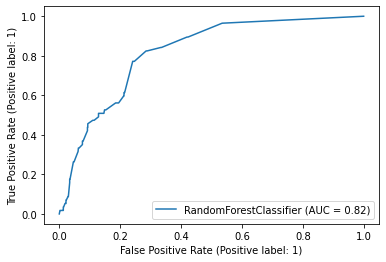

In [63]:
plt.figure(figsize=(10,10))
plot_roc_curve(clf,x_test_new,y_test_new)
plt.show()

## Decision Tree

In [61]:
def objective(trial):
    
    num_samples_split = trial.suggest_int('num_samples_split', 2, 20)
    max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
    clf = DecisionTreeClassifier(min_samples_split=num_samples_split, max_depth=max_depth)
    return cross_val_score(clf, x_train_sampling_new, y_train_sampling_new, 
           n_jobs=-1, cv=5,scoring='f1').mean()

In [62]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2021-05-31 04:25:02,927] A new study created in memory with name: no-name-d5a5d7c5-b61d-450c-9268-706f8656f379
[I 2021-05-31 04:25:03,855] Trial 0 finished with value: 0.8838840929184736 and parameters: {'num_samples_split': 12, 'max_depth': 16.12013306097767}. Best is trial 0 with value: 0.8838840929184736.
[I 2021-05-31 04:25:04,423] Trial 1 finished with value: 0.8098479893345049 and parameters: {'num_samples_split': 17, 'max_depth': 3.122270574098765}. Best is trial 0 with value: 0.8838840929184736.
[I 2021-05-31 04:25:04,976] Trial 2 finished with value: 0.7998575416503114 and parameters: {'num_samples_split': 12, 'max_depth': 1.8148398407980315}. Best is trial 0 with value: 0.8838840929184736.
[I 2021-05-31 04:25:05,034] Trial 3 finished with value: 0.8776089981011651 and parameters: {'num_samples_split': 18, 'max_depth': 19.88565034242019}. Best is trial 0 with value: 0.8838840929184736.
[I 2021-05-31 04:25:05,086] Trial 4 finished with value: 0.8771685733009413 and parameter

[I 2021-05-31 04:25:07,021] Trial 38 finished with value: 0.8719041457835598 and parameters: {'num_samples_split': 20, 'max_depth': 13.728882190611907}. Best is trial 36 with value: 0.8995837526083188.
[I 2021-05-31 04:25:07,086] Trial 39 finished with value: 0.8941681700164231 and parameters: {'num_samples_split': 2, 'max_depth': 17.75379485660529}. Best is trial 36 with value: 0.8995837526083188.
[I 2021-05-31 04:25:07,138] Trial 40 finished with value: 0.8098479893345049 and parameters: {'num_samples_split': 2, 'max_depth': 3.7607934766490643}. Best is trial 36 with value: 0.8995837526083188.
[I 2021-05-31 04:25:07,199] Trial 41 finished with value: 0.8940872318498148 and parameters: {'num_samples_split': 3, 'max_depth': 24.99442599139901}. Best is trial 36 with value: 0.8995837526083188.
[I 2021-05-31 04:25:07,250] Trial 42 finished with value: 0.836986723808209 and parameters: {'num_samples_split': 5, 'max_depth': 6.274847730398262}. Best is trial 36 with value: 0.8995837526083188

In [63]:
trial = study.best_trial
print(trial.value)
print(trial.params)

0.8995837526083188
{'num_samples_split': 2, 'max_depth': 18.061005095518446}


In [64]:
clf=DecisionTreeClassifier(min_samples_split=2, max_depth=trial.params['max_depth'])
clf.fit(x_train_sampling_new,y_train_sampling_new)

DecisionTreeClassifier(max_depth=18.061005095518446)

In [65]:
pred_new=clf.predict(x_test_new)
print(accuracy_score(y_test_new,pred_new))

0.8497409326424871


In [66]:
pred_prob = clf.predict_proba(x_test_new)

In [68]:
from sklearn.metrics import roc_curve

In [69]:
fpr, tpr, thresholds = roc_curve(y_test_new, pred_prob[:,1])
arg = np.argmin((1 - tpr) ** 2 + fpr ** 2)
print('tpr: {:.4f}'.format(tpr[arg]))
print('fpr: {:.4f}'.format(fpr[arg]))
print('threshold: {:.4f}'.format(thresholds[arg]))

tpr: 0.4386
fpr: 0.1355
threshold: 0.0833


In [71]:
print('tpr: {:.4f}'.format(tpr[np.where(thresholds >= 0.5)[0][-1]]))
print('fpr: {:.4f}'.format(fpr[np.where(thresholds >= 0.5)[0][-1]]))
print('threshold: {:.4f}'.format(0.5))

tpr: 0.3860
fpr: 0.1211
threshold: 0.5000


In [72]:
print(accuracy_score(y_test_new,pred_prob[:,1] >= thresholds[arg]))

0.8393782383419689


In [73]:
print(accuracy_score(y_test_new,pred_prob[:,1] >= 0.5))

0.8497409326424871


In [74]:
from sklearn.metrics import f1_score
print(f1_score(y_test_new,pred_prob[:,1] >= thresholds[arg], average='binary'))

0.24390243902439024


In [75]:
from sklearn.metrics import f1_score
print(f1_score(y_test_new,pred_prob[:,1] >= 0.5, average='binary'))

0.23280423280423282


<Figure size 720x720 with 0 Axes>

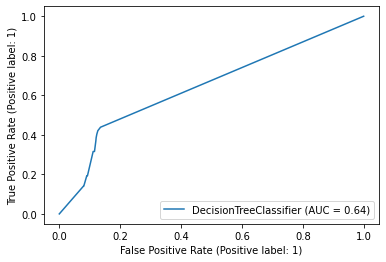

In [76]:
plt.figure(figsize=(10,10))
plot_roc_curve(clf,x_test_new,y_test_new)
plt.show()

## Logistic Regression


In [77]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

In [78]:
df_logistic = df.drop(['id', 'avg_glucose_level', 'bmi', 'age', 'gender', 'Residence_type'], axis=1)

In [79]:
df_logistic

,hypertension,heart_disease,ever_married,work_type,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,0,1,Yes,Private,formerly smoked,1,Obesity,Elderly,High
1,0,0,Yes,Self-employed,never smoked,1,Overweight,Elderly,High
2,0,1,Yes,Private,never smoked,1,Obesity,Elderly,Normal
3,0,0,Yes,Private,smokes,1,Obesity,Mid Adults,High
4,1,0,Yes,Self-employed,never smoked,1,Ideal,Elderly,High
...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,never smoked,0,Overweight,Elderly,Low
5106,0,0,Yes,Self-employed,never smoked,0,Obesity,Elderly,Normal
5107,0,0,Yes,Self-employed,never smoked,0,Obesity,Adults,Low
5108,0,0,Yes,Private,formerly smoked,0,Overweight,Mid Adults,High


In [80]:
# df_logistic['gender']=df_logistic["gender"].map({"Male":0,"Female":1,"Other":2}).astype(int)
df_logistic['ever_married']=df_logistic["ever_married"].map({"Yes":1,"No":0}).astype(int)
# df_logistic['Residence_type']=df_logistic["Residence_type"].map({"Urban":1,"Rural":0}).astype(int)
df_logistic['work_type']=df_logistic['work_type'].map({"Private":0,'Self-employed':1,'children':2,'Govt_job':3,
                                      "Never_worked":4})
df_logistic['smoking_status']=df_logistic['smoking_status'].map({'never smoked':0,'Unknown':1,'formerly smoked':2,
                                                "smokes":3})

df_logistic['bmi_cat']=df_logistic["bmi_cat"].map({"Underweight":0,"Ideal":1,"Overweight":2, "Obesity":3}).astype(int)
df_logistic['age_cat']=df_logistic["age_cat"].map({"Children":0,"Teens":1, 'Adults':2, 'Mid Adults':3, 'Elderly':4}).astype(int)
df_logistic['glucose_cat']=df_logistic["glucose_cat"].map({"Low":0,"Normal":1, 'High':2, 'Very High':3}).astype(int)


In [81]:
Y_new=df2['stroke']
X_new=df2.drop('stroke', axis=1)

In [82]:
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(X_new,Y_new,test_size=0.2,random_state=42)

In [83]:
y_train_new.value_counts()

0    3691
1     168
Name: stroke, dtype: int64

In [84]:
y_test_new.value_counts()

0    908
1     57
Name: stroke, dtype: int64

In [85]:
smt=SMOTE()
x_train_sampling_new,y_train_sampling_new=smt.fit_resample(x_train_new,y_train_new)

In [86]:
y_train_sampling_new.value_counts()

1    3691
0    3691
Name: stroke, dtype: int64

In [87]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train_sampling_new,y_train_sampling_new)

LogisticRegression()

In [88]:
pred_new=clf.predict(x_test_new)
print(accuracy_score(y_test_new,pred_new))

0.7316062176165803


In [89]:
pred_prob = clf.predict_proba(x_test_new)

In [90]:
fpr, tpr, thresholds = roc_curve(y_test_new, pred_prob[:,1])
arg = np.argmin((1 - tpr) ** 2 + fpr ** 2)
print('tpr: {:.4f}'.format(tpr[arg]))
print('fpr: {:.4f}'.format(fpr[arg]))
print('threshold: {:.4f}'.format(thresholds[arg]))

tpr: 0.8070
fpr: 0.1971
threshold: 0.6096


In [91]:
print('tpr: {:.4f}'.format(tpr[np.where(thresholds >= 0.5)[0][-1]]))
print('fpr: {:.4f}'.format(fpr[np.where(thresholds >= 0.5)[0][-1]]))
print('threshold: {:.4f}'.format(0.5))

tpr: 0.8421
fpr: 0.2456
threshold: 0.5000


In [92]:
print(accuracy_score(y_test_new,pred_prob[:,1] >= thresholds[arg]))

0.8031088082901554


In [93]:
print(accuracy_score(y_test_new,pred_prob[:,1] >= 0.5))

0.7316062176165803


In [94]:
from sklearn.metrics import f1_score
print(f1_score(y_test_new,pred_prob[:,1] >= thresholds[arg], average='binary'))

0.326241134751773


In [95]:
from sklearn.metrics import f1_score
print(f1_score(y_test_new,pred_prob[:,1] >= 0.5, average='binary'))

0.2704225352112676


<Figure size 720x720 with 0 Axes>

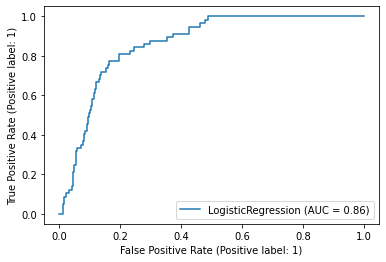

In [96]:
plt.figure(figsize=(10,10))
plot_roc_curve(clf,x_test_new,y_test_new)
plt.show()